In [1]:
from _utils import *

# Load dataset from file
folder_path = '/mnt/home/tudomlumleart/ceph/10_ToniaDataset/ToniaDataset_withPolys.mat'

dataset = scipy.io.loadmat(folder_path)

# Hox locus dataset
nHox = 72
ctcfNtPolysHox = dataset['ctcfNtPolysHox']
ctcfPolysHox = dataset['ctcfPolysHox']
ntPolysHox = dataset['ntPolysHox']
radNtPolysHox = dataset['radNtPolysHox']
radPolysHox = dataset['radPolysHox']

# Sox locus dataset
nSox = 93
ctcfNtPolysSox = dataset['ctcfNtPolysSox']
ctcfPolysSox = dataset['ctcfPolysSox']
ntPolysSox = dataset['ntPolysSox']
radNtPolysSox = dataset['radNtPolysSox']
radPolysSox = dataset['radPolysSox']

# Interpolate polymers to fill in the NaN values 
ctcfNtPolysHox = interpolate_polymers(ctcfNtPolysHox)
ctcfPolysHox = interpolate_polymers(ctcfPolysHox)
ntPolysHox = interpolate_polymers(ntPolysHox)
radNtPolysHox = interpolate_polymers(radNtPolysHox)
radPolysHox = interpolate_polymers(radPolysHox)

ctcfNtPolysSox = interpolate_polymers(ctcfNtPolysSox)
ctcfPolysSox = interpolate_polymers(ctcfPolysSox)
ntPolysSox = interpolate_polymers(ntPolysSox)
radNtPolysSox = interpolate_polymers(radNtPolysSox)
radPolysSox = interpolate_polymers(radPolysSox)


def calculate_distance_map(polys):
    # Extract the dimensions of the input array
    num_probes, num_coords, num_cells = polys.shape
    
    # Initialize an array of the same shape to hold the interpolated values
    new_maps = np.zeros((num_cells, num_probes, num_probes))
    
    # Iterate over each cell
    for c in range(num_cells):
        # Extract the data for the current cell
        curr_cells = polys[:, :, c]
        
        # Skip cells with all missing values
        if np.all(np.isnan(curr_cells)):
            continue  # This leaves a matrix of zeros in the output array
        
        # Calculate the pairwise Euclidean distance between each pair of probes
        dmap = squareform(pdist(curr_cells))
        
        # Assign the distance map to the corresponding position in the output array
        new_maps[c, :, :] = dmap
    
    # Return the array with interpolated values
    return new_maps

# Generate distance maps from interpolated polymers
ctcfNtMapsHox = calculate_distance_map(ctcfNtPolysHox)
ctcfMapsHox = calculate_distance_map(ctcfPolysHox)
ntMapsHox = calculate_distance_map(ntPolysHox)
radNtMapsHox = calculate_distance_map(radNtPolysHox)
radMapsHox = calculate_distance_map(radPolysHox)

ctcfNtMapsSox = calculate_distance_map(ctcfNtPolysSox)
ctcfMapsSox = calculate_distance_map(ctcfPolysSox)
ntMapsSox = calculate_distance_map(ntPolysSox)
radNtMapsSox = calculate_distance_map(radNtPolysSox)
radMapsSox = calculate_distance_map(radPolysSox)

# Plot the median maps of these distance maps 
# To check if the distance maps are reasonable
ctcfNtMapsHox_median = np.nanmedian(ctcfNtMapsHox, axis=0)
ctcfMapsHox_median = np.nanmedian(ctcfMapsHox, axis=0)
ntMapsHox_median = np.nanmedian(ntMapsHox, axis=0)
radNtMapsHox_median = np.nanmedian(radNtMapsHox, axis=0)
radMapsHox_median = np.nanmedian(radMapsHox, axis=0)

ctcfNtMapsSox_median = np.nanmedian(ctcfNtMapsSox, axis=0)
ctcfMapsSox_median = np.nanmedian(ctcfMapsSox, axis=0)
ntMapsSox_median = np.nanmedian(ntMapsSox, axis=0)
radNtMapsSox_median = np.nanmedian(radNtMapsSox, axis=0)
radMapsSox_median = np.nanmedian(radMapsSox, axis=0)

# Generate flatten maps from distance maps
ctcfNtFlattenHox = np.array([x.flatten() for x in ctcfNtMapsHox])
ctcfFlattenHox = np.array([x.flatten() for x in ctcfMapsHox])
ntFlattenHox = np.array([x.flatten() for x in ntMapsHox])
radNtFlattenHox = np.array([x.flatten() for x in radNtMapsHox])
radFlattenHox = np.array([x.flatten() for x in radMapsHox])

ctcfNtFlattenSox = np.array([x.flatten() for x in ctcfNtMapsSox])
ctcfFlattenSox = np.array([x.flatten() for x in ctcfMapsSox])
ntFlattenSox = np.array([x.flatten() for x in ntMapsSox])
radNtFlattenSox = np.array([x.flatten() for x in radNtMapsSox])
radFlattenSox = np.array([x.flatten() for x in radMapsSox])

allFlattenHox = np.concatenate((ctcfFlattenHox, ntFlattenHox, radFlattenHox), axis=0)
allFlattenSox = np.concatenate((ctcfFlattenSox, ntFlattenSox, radFlattenSox), axis=0)

2024-10-03 17:49:09.383270: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-03 17:49:09.426286: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/mnt/sw/nix/store/gpkc8q6zjnp3n3h3w9hbmbj6gjbxs85w-python-3.10.10-view/lib/python3.10/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [2]:
allFlattenContactHox = allFlattenHox < 250  # 1 if contact < 250 nm, 0 otherwise

In [2]:
import kmedoids
from sklearn.metrics.pairwise import euclidean_distances

In [3]:
diss = euclidean_distances(allFlattenHox)

In [23]:
kmin = 100
kmax = 200

In [24]:
dm = kmedoids.dynmsc(diss, kmax, kmin)
print("Optimal number of clusters according to the Medoid Silhouette:", dm.bestk)
print("Medoid Silhouette over range of k:", dm.losses)
print("Range of k:", dm.rangek)

Optimal number of clusters according to the Medoid Silhouette: 100
Medoid Silhouette over range of k: [0.56023011 0.56014322 0.56003886 0.55992348 0.55981561 0.55969986
 0.55957953 0.55946125 0.55932325 0.5591889  0.55904968 0.55889719
 0.55872549 0.55856806 0.55837886 0.5571844  0.55707171 0.55695294
 0.55683548 0.55667216 0.55650612 0.55634115 0.55618532 0.55600265
 0.55578747 0.55558612 0.55538735 0.55517999 0.55498375 0.55476762
 0.55453965 0.55429532 0.5540548  0.55381045 0.55356458 0.55331955
 0.55304003 0.55275993 0.55247092 0.55215839 0.55148318 0.55121037
 0.55091573 0.55061696 0.55028144 0.51915681 0.51912107 0.51907946
 0.51903378 0.51898869 0.51890056 0.51885565 0.51880408 0.51875183
 0.51869718 0.51864498 0.51858744 0.51852664 0.51847751 0.51842662
 0.51836667 0.51830913 0.51824919 0.5181887  0.51812983 0.51806828
 0.51800915 0.51268317 0.51263413 0.51258655 0.51252748 0.51247221
 0.51241591 0.51235895 0.51229988 0.51224048 0.51217985 0.51211762
 0.51205303 0.51196642 0.51

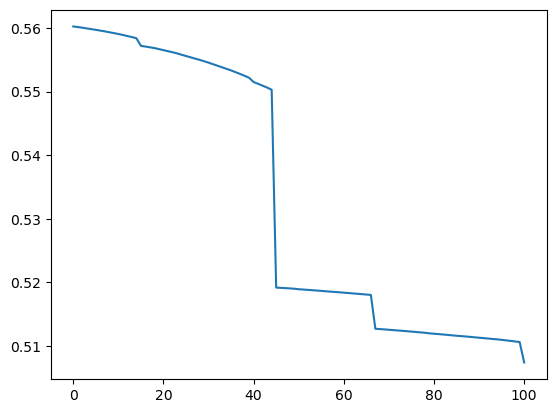

In [25]:
plt.plot(dm.losses)

In [26]:
medoids_idx = dm.medoids

In [27]:
allFlattenContactHox[medoids_idx[1]]

array([ True,  True,  True, ...,  True,  True,  True])

In [31]:
# Plot 100 of medoids
medoids_candidate = allFlattenHox[medoids_idx, :]

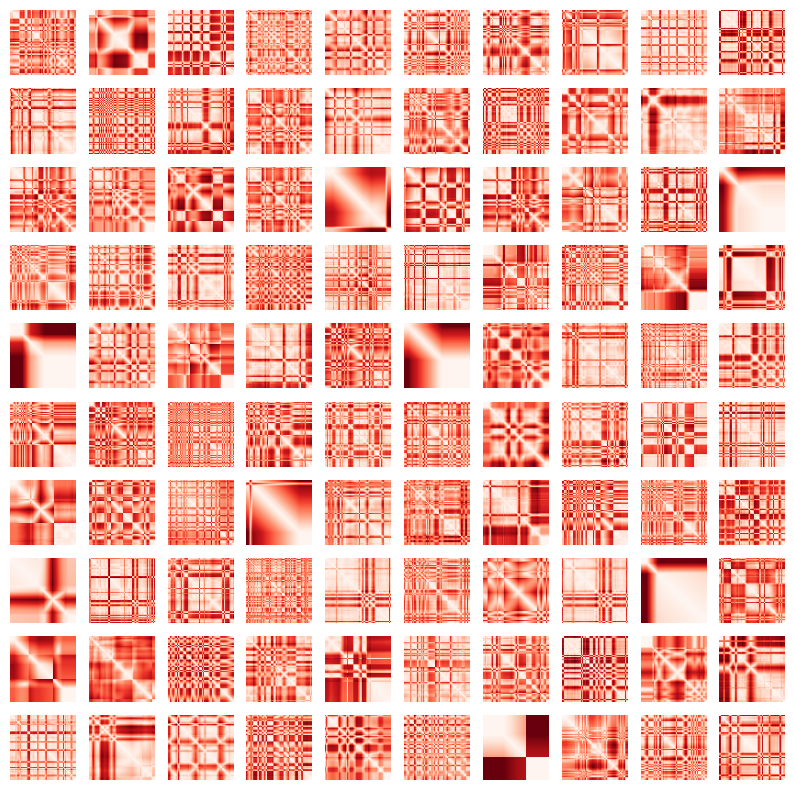

In [35]:
# Plot the heatmap of all medoids
fig, ax = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(medoids_candidate[i*10+j].reshape(72, 72), cmap='Reds')
        ax[i, j].axis('off')

In [28]:
pca_hox = PCA(n_components=2)
pca_hox.fit(allFlattenHox)
# Fit the PCA model to all Hox datasets
ctcfHox = pca_hox.transform(ctcfFlattenHox)
ntHox = pca_hox.transform(ntFlattenHox)
radHox = pca_hox.transform(radFlattenHox)

# Convert the principal components to a DataFrame
ctcfHox_df = pd.DataFrame(ctcfHox, columns=['PC1', 'PC2'])
ctcfHox_df['label'] = 'ctcfDegHox'
ntHox_df = pd.DataFrame(ntHox, columns=['PC1', 'PC2'])
ntHox_df['label'] = 'ntHox'
radHox_df = pd.DataFrame(radHox, columns=['PC1', 'PC2'])
radHox_df['label'] = 'radDegHox'

In [38]:
all_df = pd.concat([ctcfHox_df, ntHox_df, radHox_df], axis=0)
all_df['medoids'] = dm.labels

In [41]:
# Find how many medoids are in each cluster
medoids_count = all_df.groupby('medoids').size()

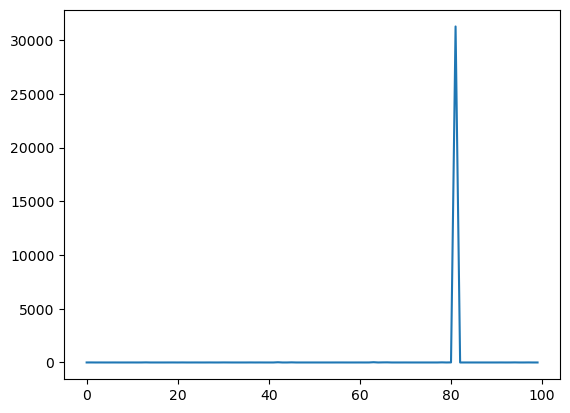

In [43]:
plt.plot(medoids_count)

<Axes: xlabel='PC1', ylabel='PC2'>

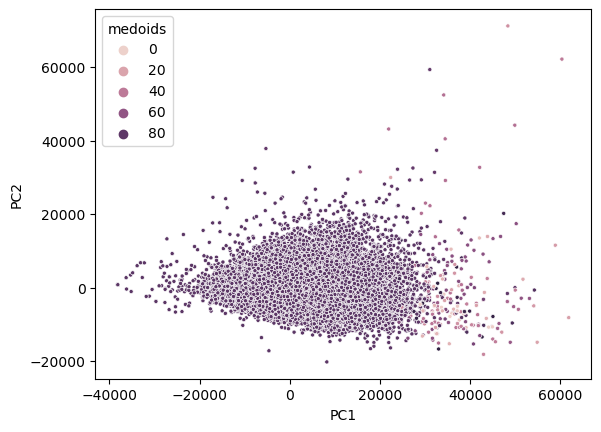

In [40]:
sns.scatterplot(data=all_df, x='PC1', y='PC2', hue='medoids', marker='.')

In [36]:
dm.labels

array([81, 81, 30, ..., 81, 81, 81], dtype=uint64)

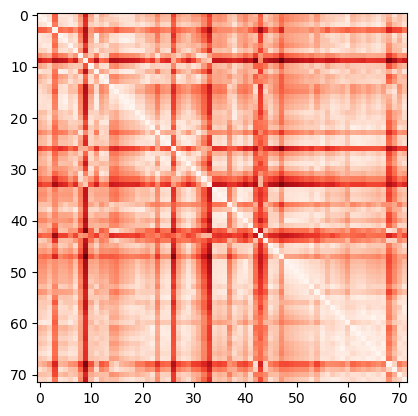

In [44]:
plt.imshow(allFlattenHox[81].reshape(72, 72), cmap='Reds')

In [17]:
kmd = kmedoids.fasterpam(diss, medoids=50, max_iter=100, init='random', random_state=None, n_cpu=-1)

In [18]:
medoid_groups = kmd.labels

In [19]:
medoids_idx = kmd.medoids

In [20]:
medoids_candidate = allFlattenHox[medoids_idx, :]

In [22]:
num_medoids=[]
for x in np.unique(medoid_groups):
    num_medoids.append(np.sum(medoid_groups == x))

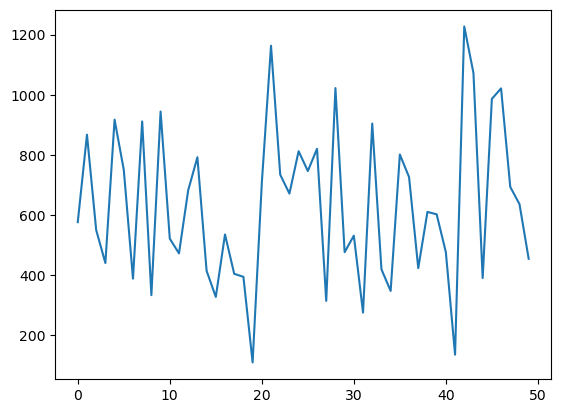

In [23]:
plt.plot(num_medoids)

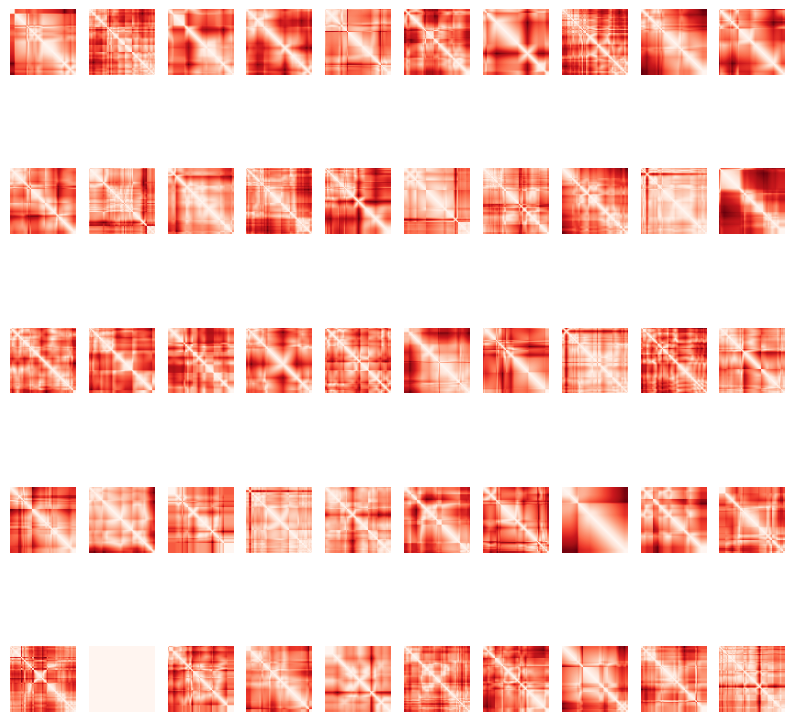

In [26]:
# Plot the heatmap of all medoids
fig, ax = plt.subplots(5, 10, figsize=(10, 10))
for i in range(5):
    for j in range(10):
        ax[i, j].imshow(medoids_candidate[i*10+j].reshape(72, 72), cmap='Reds')
        ax[i, j].axis('off')

In [29]:
all_df = pd.concat([ctcfHox_df, ntHox_df, radHox_df], axis=0)
all_df['medoids'] = kmd.labels

<Axes: xlabel='PC1', ylabel='PC2'>

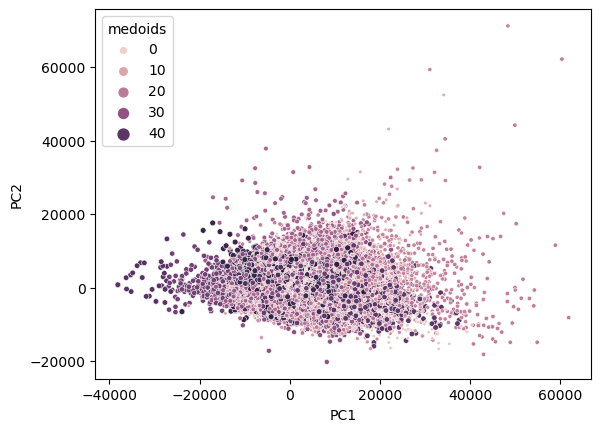

In [32]:
sns.scatterplot(data=all_df, x='PC1', y='PC2', hue='medoids', size='medoids', marker='.')

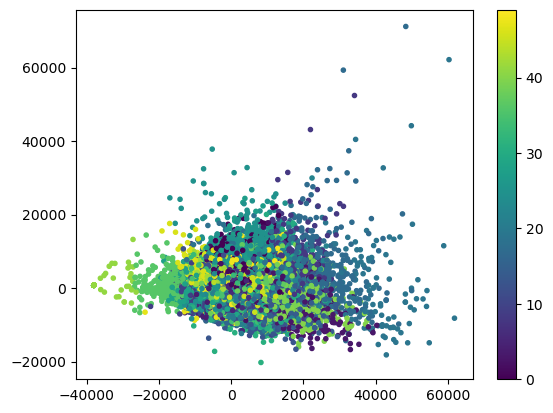

In [35]:
plt.scatter(all_df['PC1'], all_df['PC2'], c=all_df['medoids'], marker='.')
plt.colorbar()

/tmp/ipykernel_3296938/3867355675.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(mappable=ax, orientation='horizontal')


AttributeError: 'numpy.ndarray' object has no attribute 'get_array'

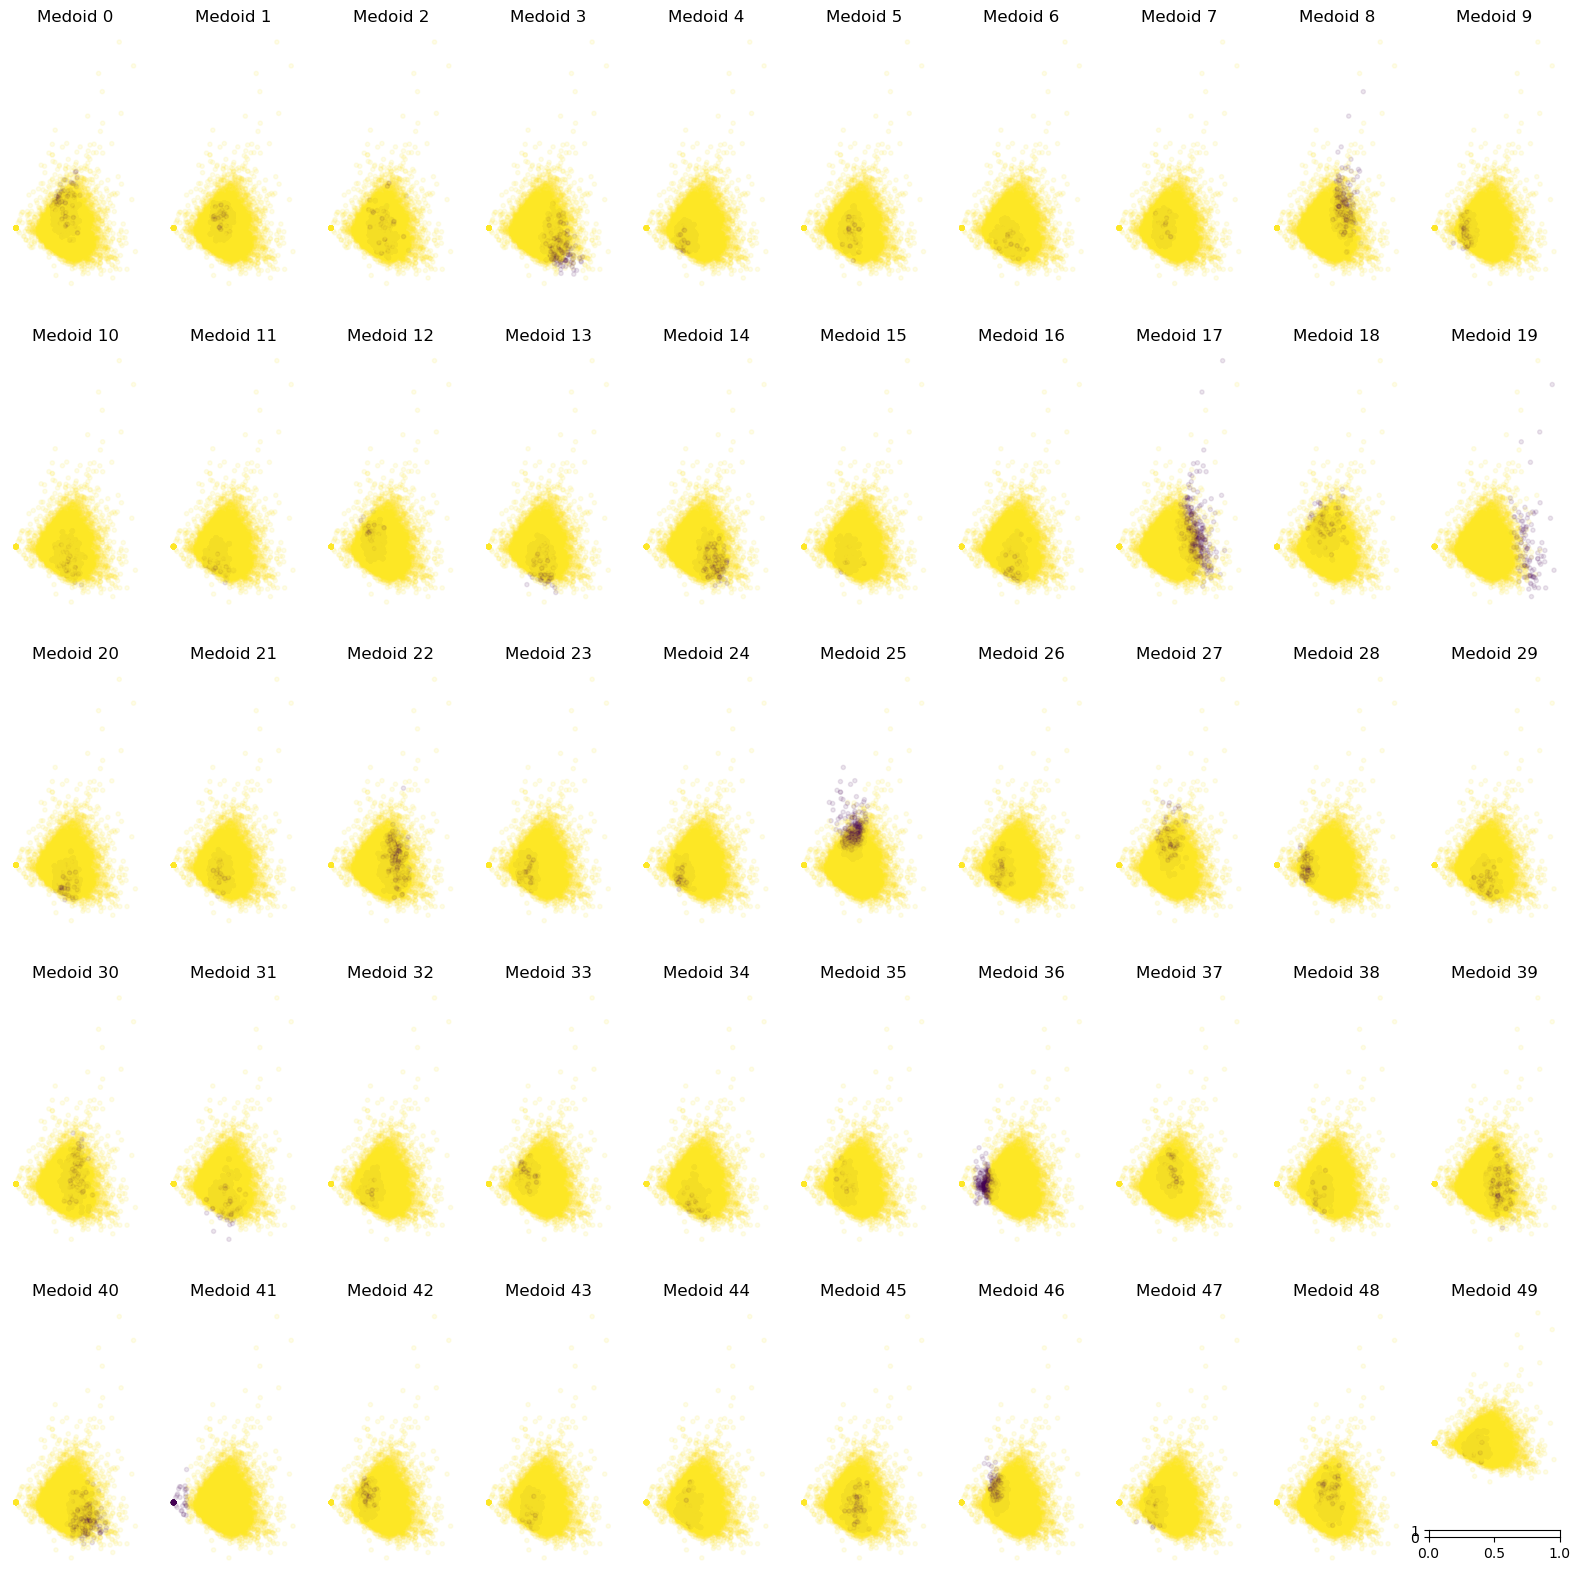

In [41]:
# Plot the scatter plot of some medoids
fig, ax = plt.subplots(5, 10, figsize=(20, 20))
for i in range(5):
    for j in range(10):
        ax[i, j].scatter(all_df['PC1'], all_df['PC2'], c=all_df['medoids'] == i*10+j, marker='.', alpha=0.1, cmap='viridis_r')
        ax[i, j].set_title(f'Medoid {i*10+j}')
        ax[i, j].axis('off')

        

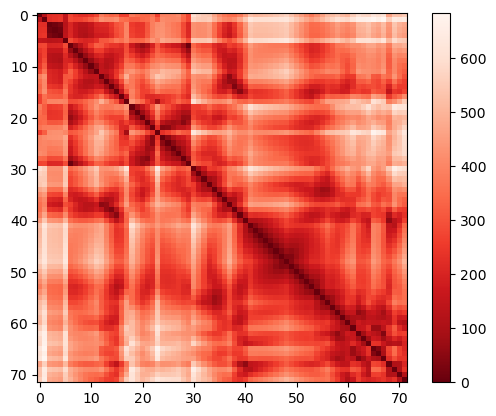

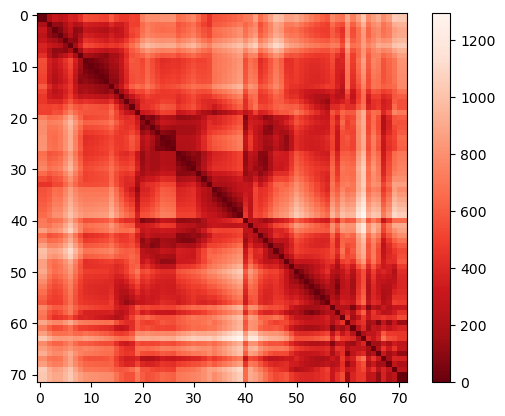

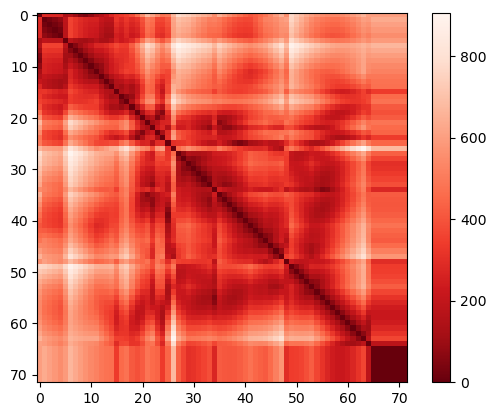

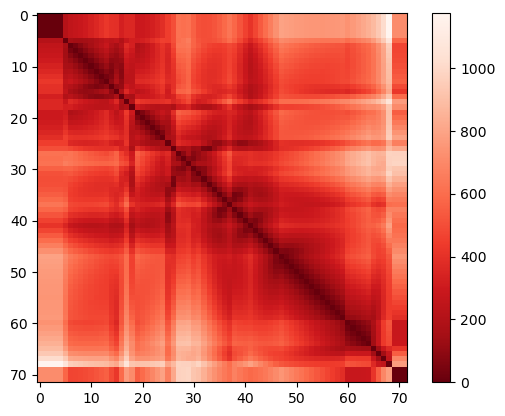

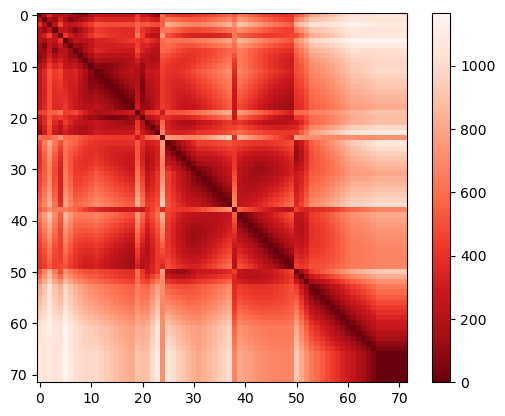

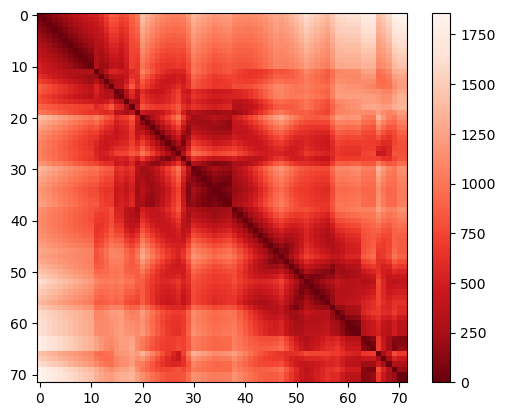

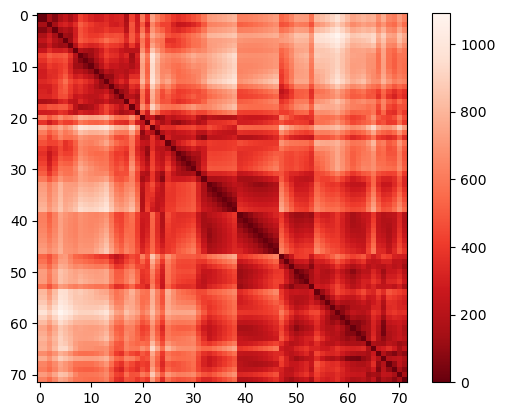

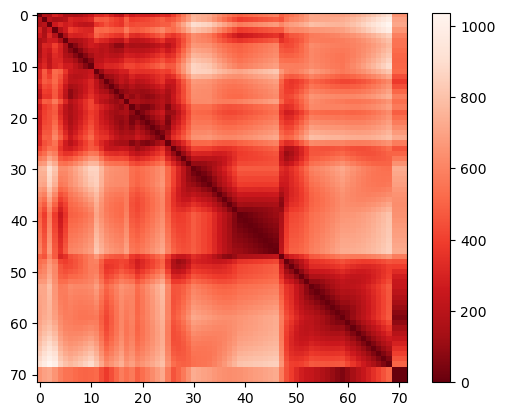

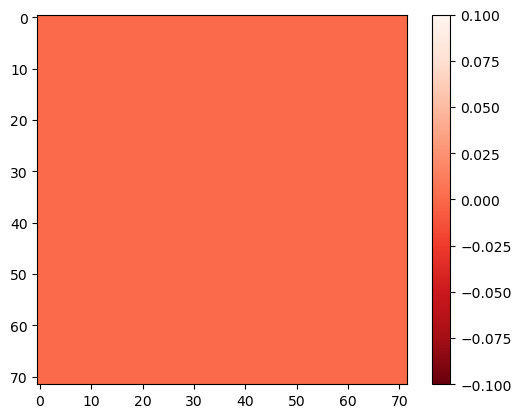

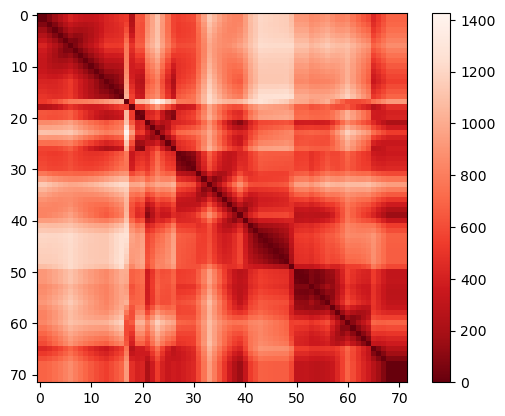

In [16]:
for x in medoids_candidate:
    plt.imshow(x.reshape(72, 72), cmap='Reds_r')
    plt.colorbar()
    plt.show()